**XÂY DỰNG TẬP DỮ LIỆU NHẬN DIỆN RAU CỦ**

# **Import library**

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import cv2
import math
import os, sys
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from skimage import feature, exposure
from sklearn.model_selection import GridSearchCV


from sklearn import model_selection
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#**1. Đọc và khảo sát dữ liệu**



Dữ liệu của tập train và tập test cho bài toán phân lớp gồm 15 thuộc tính nhãn

Link data: https://drive.google.com/file/d/1JBAxS6S33NMfCu2K8gx5mbC-WcWs1TyR/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/data.zip

Archive:  /content/drive/MyDrive/data.zip
   creating: data/
   creating: data/dev/
   creating: data/dev/Bean/
  inflating: data/dev/Bean/0023.jpg  
  inflating: data/dev/Bean/0033.jpg  
  inflating: data/dev/Bean/0043.jpg  
  inflating: data/dev/Bean/0046.jpg  
  inflating: data/dev/Bean/0192.jpg  
  inflating: data/dev/Bean/0228.jpg  
  inflating: data/dev/Bean/0331.jpg  
  inflating: data/dev/Bean/0465.jpg  
  inflating: data/dev/Bean/0471.jpg  
  inflating: data/dev/Bean/0606.jpg  
  inflating: data/dev/Bean/0611.jpg  
  inflating: data/dev/Bean/0613.jpg  
  inflating: data/dev/Bean/0640.jpg  
  inflating: data/dev/Bean/0921.jpg  
  inflating: data/dev/Bean/0923.jpg  
  inflating: data/dev/Bean/0927.jpg  
  inflating: data/dev/Bean/0930.jpg  
  inflating: data/dev/Bean/0931.jpg  
  inflating: data/dev/Bean/0941.jpg  
  inflating: data/dev/Bean/0943.jpg  
  inflating: data/dev/Bean/1132.jpg  
  inflating: data/dev/Bean/1144.jpg  
  inflating: data/dev/Bean/1214.jpg  
  inflating: d

## **Đọc và ghi tập train**





In [ ]:
train_images = []
train_labels = []

types = os.listdir('data/train')
for t in types:
    images = os.listdir('data/train/' + t)
    for img_path in images:
        img = Image.open('data/train/' + t + '/' + img_path)
        train_images.append(img)
        train_labels.append(t)


## **Đọc và ghi tập validation (development)**

In [ ]:
dev_images = []
dev_labels = []

types = os.listdir('data/dev')
for t in types:
    images = os.listdir('data/dev/'+ t) 
    for img_path in images:
        img = Image.open('data/dev/'+ t + '/' + img_path) 
        dev_images.append(img)
        dev_labels.append(t)

## **Đọc và ghi tập test**

In [ ]:
test_images = []
test_labels = []

types = os.listdir('data/test')
for t in types:
    images = os.listdir('data/test/'+ t) 
    for img_path in images:
        img = Image.open('data/test/'+ t + '/' + img_path) 
        test_images.append(img)
        test_labels.append(t)

## **Khảo sát dataset**

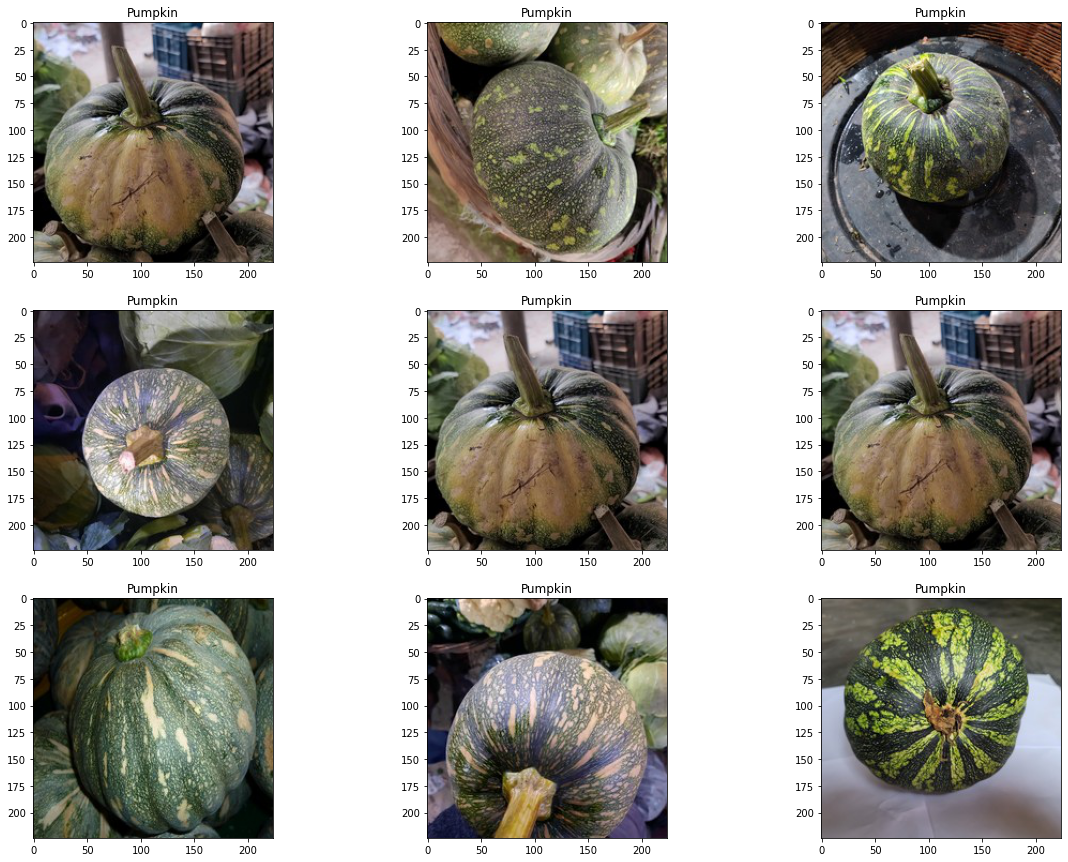

In [ ]:
plt.figure(figsize=(20,15))
i = 200
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.title('%s' %train_labels[i])
  plt.imshow(train_images[i])
plt.show()

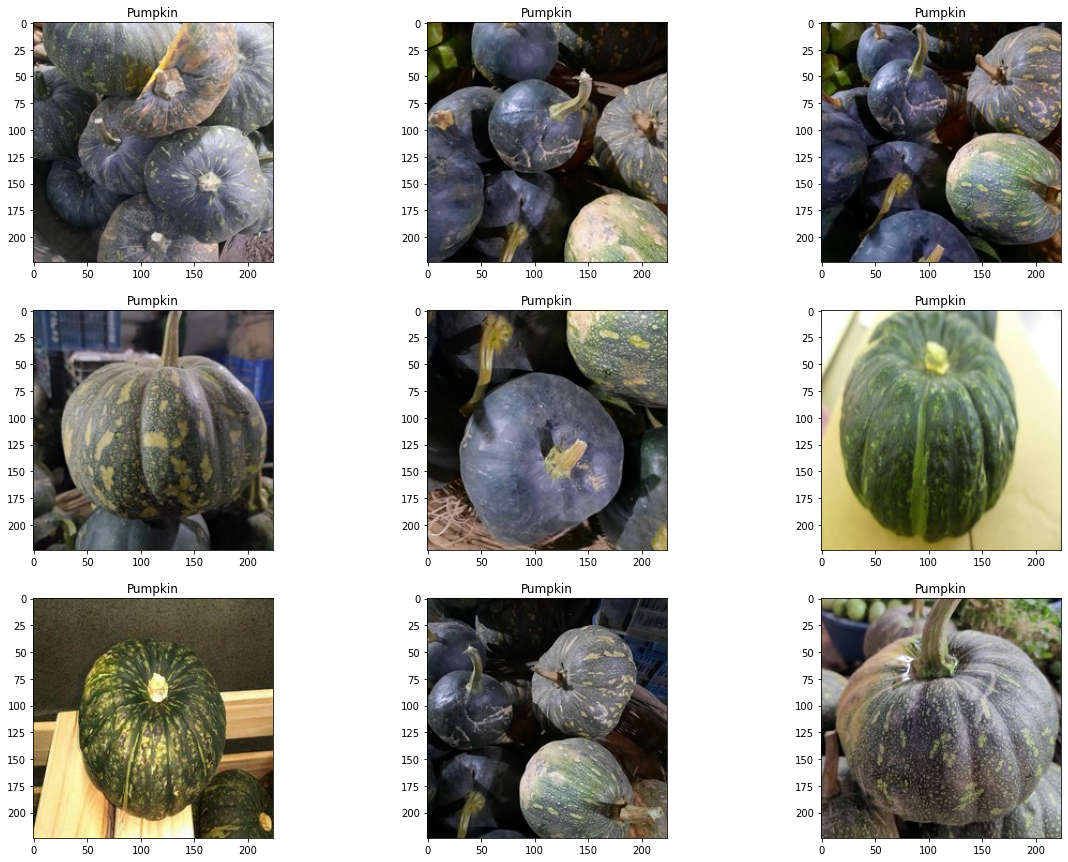

In [ ]:
plt.figure(figsize=(20,15))
i = 200
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.title('%s' %test_labels[i])
  plt.imshow(test_images[i])
plt.show()

#**2. Xử lý dataset (Xử lý ảnh)**

##**Tập train**

In [ ]:
image = []
hog = []
pixel=128   
for i in range(1200):
  img=train_images[i]
  img=img.resize((pixel,pixel))
  img=img.convert('L')
  img=np.asarray(img)
  img = cv2.equalizeHist(img)
  (img, H)= feature.hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2", visualize= True)
  hogImage = exposure.rescale_intensity(H, out_range=(0, 255))
  hogImage = hogImage.astype("uint8")
  hog.append(hogImage)
  image.append(img)

##**Tập validation**

In [ ]:
image = []
hog = []
pixel=128   
for i in range(400):
  img=dev_images[i]
  img=img.resize((pixel,pixel))
  img=img.convert('L')
  img=np.asarray(img)
  img = cv2.equalizeHist(img)
  (img, H)= feature.hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2", visualize= True)
  hogImage = exposure.rescale_intensity(H, out_range=(0, 255))
  hogImage = hogImage.astype("uint8")
  hog.append(hogImage)
  image.append(img)

##**Tập test** 

In [ ]:
image1 = []
pixel=128   
for i in range(400):
  img=test_images[i]
  img=img.resize((pixel,pixel))
  img=img.convert('L')
  img=np.asarray(img)
  img = cv2.equalizeHist(img)
  (img, H)= feature.hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2", visualize= True)
  hogImage = exposure.rescale_intensity(H, out_range=(0, 255))
  hogImage = hogImage.astype("uint8")
  hog.append(hogImage)
  image1.append(img)

##**Kết quả sau khi xử lý (Trực quan một số hình ảnh)**

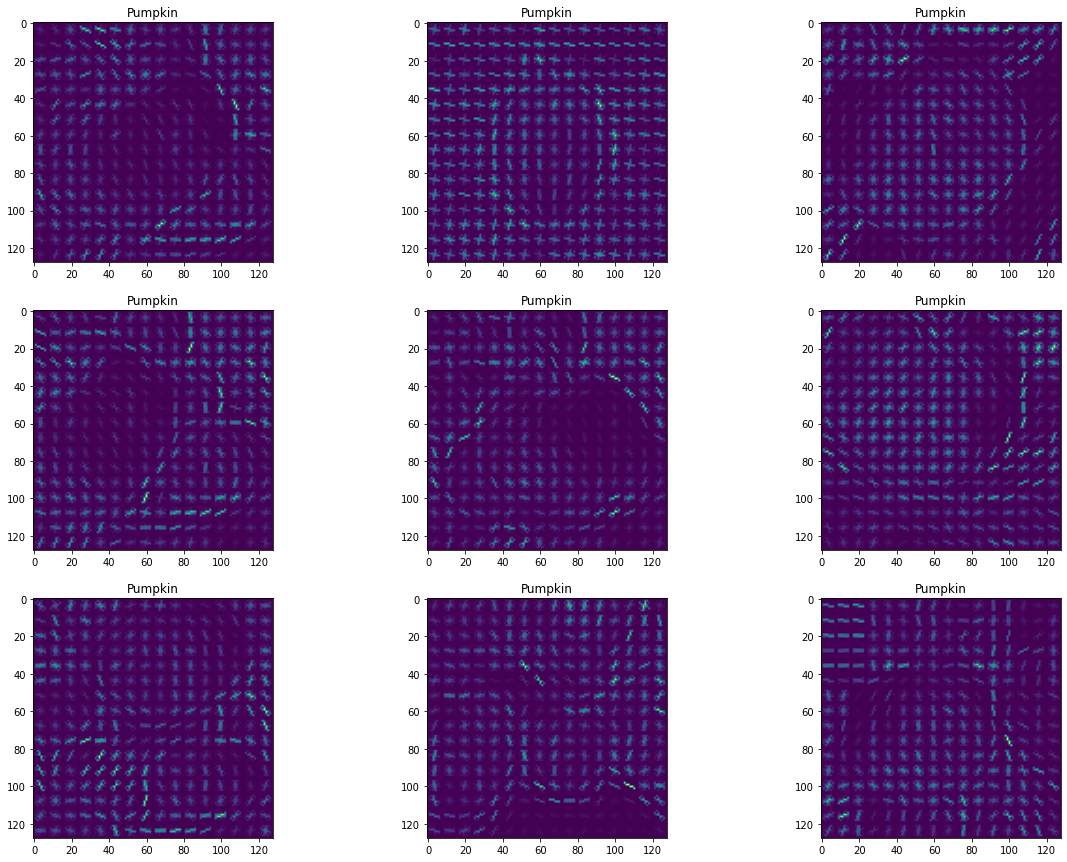

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.title('%s' %train_labels[i])
  plt.imshow(hog[i])
plt.show()